<a href="https://colab.research.google.com/github/subhash505/NLP_code/blob/main/1_CV_Edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

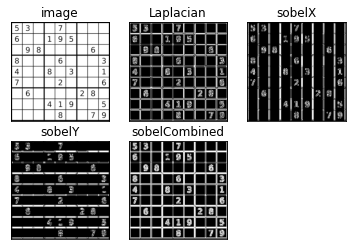

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("sudoku.png", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined']
images = [img, lap, sobelX, sobelY, sobelCombined]
for i in range(5):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

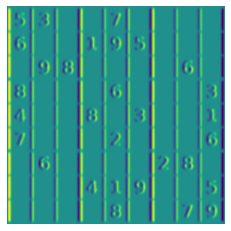

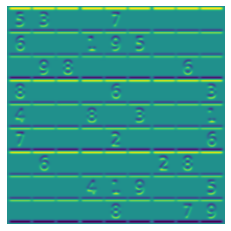

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sudoku.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5, 5), 0)
scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)

plt.axis("off")
plt.imshow(scharrx)
plt.show()

plt.axis("off")
plt.imshow(scharry)
plt.show()

Corner Detection

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Loading the Image and converting into a gray image

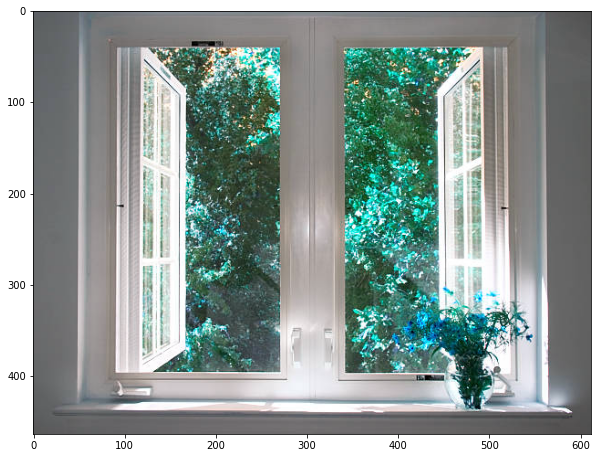

In [ ]:
img = cv2.imread('demo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

Detecting Corners of the Image

In [ ]:
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
corners = np.int0(corners)

Plotting the corner points

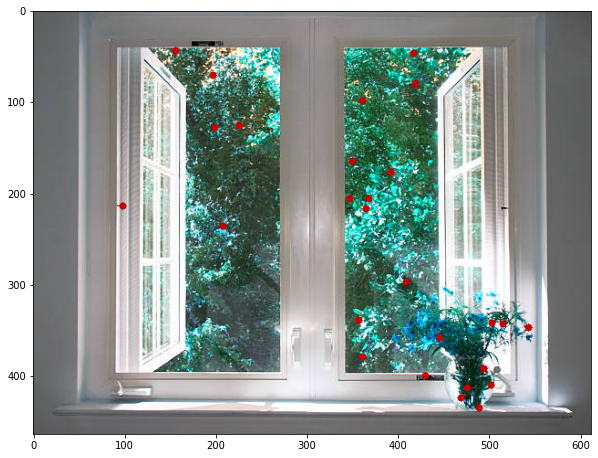

In [ ]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 4, 200, -1)
 
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

The Process of Canny edge detection algorithm can be broken down to 5 different steps:

1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image.
3. Apply non-maximum suppression to get rid of spurious response to edge detection.
4. Apply double threshold to determine potential edges.
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

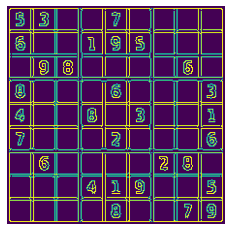

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("sudoku.png")
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(imggray, (5, 5), 0)
canny = cv2.Canny(blurred,20,50)

plt.axis("off")
plt.imshow(canny)
plt.show()

cv2.cornerHarris(img, blockSize, ksize, k)
Parameters:

img - Input image in grayscale.
blockSize - Size of neighbourhood patch or window size considered for corner detection.
ksize - Kernel size for taking the Sobel derivative.
k - Empirical constant to be used in the Harris detector; k should lie between 0.04 and 0.06 for good results.

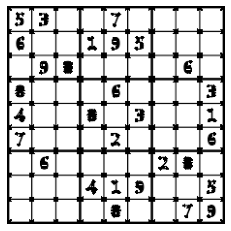

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sudoku.png')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ch = cv2.cornerHarris(img1,3,3,0.05)
img[ch>0.01*ch.max()]=[0,0,0] #Thresholding

plt.axis("off")
plt.imshow(img)
plt.show()